# A demo case for SelectKBest (sklearn)    
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [2]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [65]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [66]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [67]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [69]:
bos.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24

In [70]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Create feature and target variable for Regression problema

In [71]:
X_reg=bos.iloc[:,0:12] # features: R&D Spend, Administration, Marketing Spend
# I have not considered 'State' in feature set. You can use it after label encoding.
y_reg=bos.iloc[:,13] # Target variable: Profit

Feature selection method: SelectKBest    

Score function:    
For regression: f_regression, mutual_info_regression

In [72]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [74]:
# Create the object for SelectKBest and fit and transform the regression data
bos_most_important_features=SelectKBest(score_func=f_regression, k=2).fit_transform(X_reg,y_reg)
# SelectKBest(chi2, k=20).fit_transform(X, y)

In [75]:
print(bos_most_important_features[:5])


[[ 6.575 15.3  ]
 [ 6.421 17.8  ]
 [ 7.185 17.8  ]
 [ 6.998 18.7  ]
 [ 7.147 18.7  ]]


In [76]:
bos_most_important_features

array([[ 6.575, 15.3  ],
       [ 6.421, 17.8  ],
       [ 7.185, 17.8  ],
       ...,
       [ 6.976, 21.   ],
       [ 6.794, 21.   ],
       [ 6.03 , 21.   ]])

In [77]:
print(X_reg.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  
0     15.3  396.90  
1     17.8  396.90  
2     17.8  392.83  
3     18.7  394.63  
4     18.7  396.90  


#### the most important features RM and PTRATIO

### Next looking for the most important 4 features

In [80]:
bos_most_important_4_features=SelectKBest(score_func=f_regression, k=4).fit_transform(X_reg,y_reg)

In [81]:
print(bos_most_important_4_features[:5])


[[  2.31    6.575 296.     15.3  ]
 [  7.07    6.421 242.     17.8  ]
 [  7.07    7.185 242.     17.8  ]
 [  2.18    6.998 222.     18.7  ]
 [  2.18    7.147 222.     18.7  ]]


#### The most important 4 features would be INDUS, RM, TAX and PTRATIO

### Next one more approach

In [82]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X_reg, y_reg = load_digits(return_X_y=True)
bos_most_important_features_2 = SelectKBest(chi2, k=2).fit_transform(X_reg, y_reg)
X_reg
# bos_most_important_features_2.shape()

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [83]:
bos_most_important_features_2

array([[ 5., 11.],
       [ 0.,  1.],
       [ 1., 16.],
       ...,
       [ 0., 16.],
       [ 0.,  0.],
       [ 0., 16.]])

In [84]:
x = bos[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = bos[['PRICE']]
x, y = load_digits(return_X_y=True)

In [85]:
x_new = SelectKBest(chi2, k=4).fit_transform(x, y)

In [86]:
x_new.shape

(1797, 4)

In [87]:
x_new

array([[ 5.,  8., 11.,  0.],
       [ 0.,  1.,  1., 16.],
       [ 1.,  8., 16., 16.],
       ...,
       [ 0.,  9., 16., 14.],
       [ 0.,  5.,  0.,  0.],
       [ 0., 12., 16.,  6.]])

### Yet another approach (work in progress ...)    
Refrence:    
https://www.programcreek.com/python/?code=md-k-sarker%2FPredicting-Health-Insurance-Cost%2FPredicting-Health-Insurance-Cost-master%2Fsrc%2FDataAnalysis.py    



In [138]:
from matplotlib import colors
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)

figure(figsize=(20, 20), dpi=80)

def getColorNames():
    colorNames = []
    for color in colors.cnames:    
        colorNames.append(color)
    return colorNames

def featuresFromFeatureSelection(X,Y,columnNames,k):
    X, Y = load_digits(return_X_y=True)
#     for f in columnNames:
#         print(f)
    X_new_withfitTransform = SelectKBest(chi2, k=k).fit(X, Y)
    colors = getColorNames()
    counter  = 0
    
    scores = X_new_withfitTransform.scores_
    scores_scaled = np.divide(scores, 1000) 
        
    for score in scores_scaled:
        #if(score > 10):
        #print('Feature {:>34}'.format(columnNames[counter]))z
#         print('{:>34}  '.format( score))
        '''Plot a graph'''    
        plt.bar(counter, score,color=colors[counter])
        counter +=1 

    plt.ylabel('Scores(1k)')
    plt.title('Scores calculated by Chi-Square Test')
    plt.legend(columnNames, bbox_to_anchor=(0., 0.8, 1., .102), loc=3,ncol=5, mode="expand", borderaxespad=0.)
    plt.show()

<Figure size 1600x1600 with 0 Axes>

In [140]:
X = bos.drop('PRICE', axis = 1)
Y = bos.PRICE
# X.columns

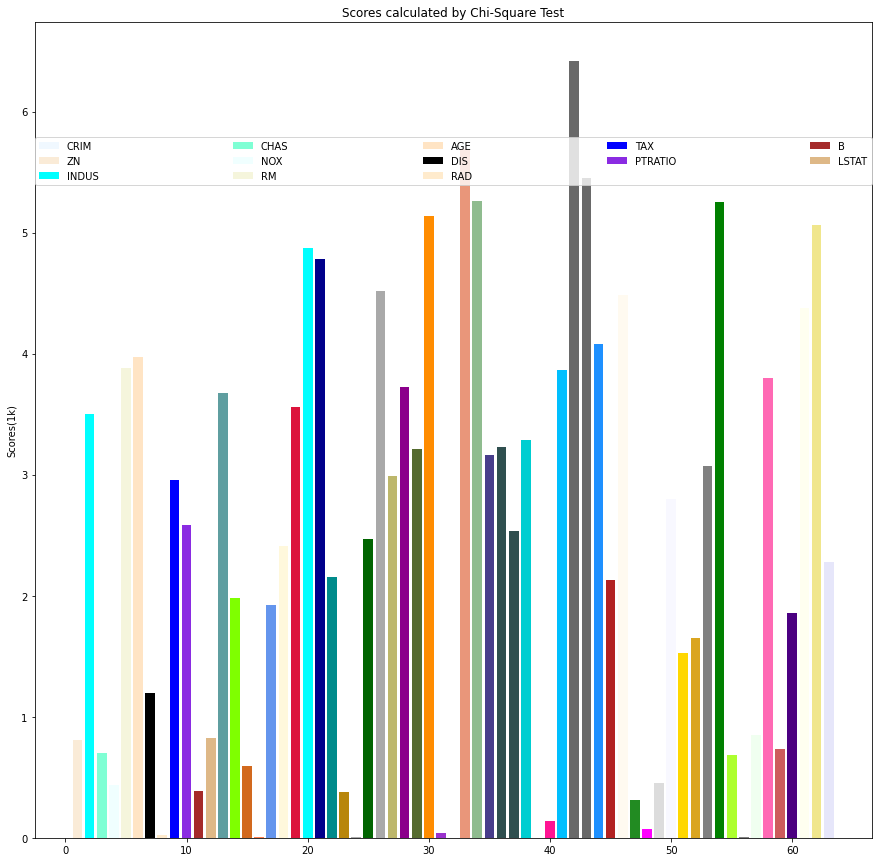

In [143]:
featuresFromFeatureSelection(X,Y,X.columns,1)